#  The Singular Value Decomposition 

In [1]:
# eigsvdgui # demo showing how various Eigenvalue routines eliminate off-diagonal entries

In [2]:
# imagesvd  # demo showing how the rank-k approximation work  (works only in Matlab)

In [3]:
import numpy as np
from numpy import eye
from numpy import size
from numpy import diag
from numpy.linalg import norm
from numpy.linalg import inv
from numpy.linalg import det
from numpy.linalg import svd
from numpy.linalg import eig
from numpy.linalg import pinv
from numpy.random import rand
from numpy.fft import fft

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12.0,10.0)

In [5]:
import math
from math import cos, sin, pi

## Unitary Matrices

A (possibly complex) square matrix $U$ is <b>unitary</b> if
$U' \, U ~=~ U \, U' ~=~ I$.

<ul><li>
every orthogonal matrix $Q$ is unitary:  $Q'\,Q ~=~ I$.
</li><li>
a <b>complex unit value</b> (a value like $z = e^{i\theta}$) is unitary:  $\overline{z}\,z ~=~ 1$.
</li><li>every diagonal matrix $D$ of complex unit values is unitary:
$D' \, D ~=~ 1$.
</li><li>
If $U$ is unitary, then the eigenvalues of $U$ are complex unit values.
</li><li>
Unitary matrices preserve the length of any vector they transform:
if $U$ is unitary, and ${\bf v}$ is a vector,
 then $\mid\mid{U\,{\bf v}}\mid\mid = \mid\mid{\bf v}\mid\mid$.
</li></ul>


In [6]:
#  All orthogonal matrices are unitary

#  random orthogonal matrix

Q = np.array([[cos(pi/3), -sin(pi/3)], [sin(pi/3),cos(pi/3)]])

Q.dot(Q.T)

array([[ 1.,  0.],
       [ 0.,  1.]])

### Nice Example of a Unitary Matrix:  The Fourier Matrix

In [7]:
FourierMatrix  =  lambda n: 1/math.sqrt(n) * fft(eye(n))

F2 = FourierMatrix(2)
F2

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [8]:
F2.dot(F2).T
det(F2)

(-0.99999999999999978+0j)

In [9]:
F4 = FourierMatrix(4)
F4

array([[ 0.5+0.j ,  0.5+0.j ,  0.5+0.j ,  0.5+0.j ],
       [ 0.5+0.j ,  0.0-0.5j, -0.5+0.j ,  0.0+0.5j],
       [ 0.5+0.j , -0.5+0.j ,  0.5+0.j , -0.5+0.j ],
       [ 0.5+0.j ,  0.0+0.5j, -0.5+0.j ,  0.0-0.5j]])

In [10]:
F4.dot(F4).T

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j]])

In [11]:
det(F4)

0.99999999999999978j

## The SVD

In [12]:
def full_svd(A):
    U, sigma, VT = np.linalg.svd(A, full_matrices=True)
    n, p = A.shape
    S = np.zeros((n,p))
    k = min(n,p)
    S[:k,:k] = np.diag(sigma)
    return (U, S, VT.T)

In [13]:
A = rand(3,3)
A

array([[ 0.41318591,  0.5650927 ,  0.68768195],
       [ 0.07973688,  0.0255478 ,  0.41304766],
       [ 0.65184228,  0.59674718,  0.52714783]])

In [14]:
U,S,V = full_svd(A)
U,S,V

(array([[-0.67550789, -0.26483797, -0.68814966],
        [-0.22289497, -0.81626496,  0.53294404],
        [-0.70285627,  0.513393  ,  0.49236237]]),
 array([[ 1.44243256,  0.        ,  0.        ],
        [ 0.        ,  0.32546195,  0.        ],
        [ 0.        ,  0.        ,  0.11371481]]),
 array([[-0.52344542,  0.49203146,  0.69563635],
        [-0.55936518,  0.41741913, -0.71615073],
        [-0.64274061, -0.76398057,  0.05672913]]))

In [15]:
U.dot(S).dot(V.T)

array([[ 0.41318591,  0.5650927 ,  0.68768195],
       [ 0.07973688,  0.0255478 ,  0.41304766],
       [ 0.65184228,  0.59674718,  0.52714783]])

In [16]:
error = norm( A - U.dot(S).dot(V.T) )
error

1.0612652031785719e-15

### Every matrix has an SVD -- even rectangular matrices

In [17]:
A = rand(4,3)
A

array([[ 0.83144248,  0.27541038,  0.31056257],
       [ 0.41392534,  0.17455095,  0.29522613],
       [ 0.7951172 ,  0.11735049,  0.04103196],
       [ 0.09104589,  0.28241758,  0.93544827]])

In [18]:
U,S,V = full_svd(A)
U,S,V

(array([[-0.63743506, -0.24765855,  0.60362534,  0.40985149],
        [-0.3790489 ,  0.0107913 ,  0.21519378, -0.89994284],
        [-0.48058543, -0.49247508, -0.72523967,  0.02309465],
        [-0.46801296,  0.83427638, -0.25170521,  0.1469397 ]]),
 array([[ 1.4176527 ,  0.        ,  0.        ],
        [ 0.        ,  0.86663328,  0.        ],
        [ 0.        ,  0.        ,  0.05043307],
        [ 0.        ,  0.        ,  0.        ]]),
 array([[-0.78412782, -0.59663647, -0.17078785],
        [-0.30352399,  0.12865652,  0.94409782],
        [-0.54131022,  0.79213157, -0.28197664]]))

In [19]:
U.dot(S).dot(V.T)

array([[ 0.83144248,  0.27541038,  0.31056257],
       [ 0.41392534,  0.17455095,  0.29522613],
       [ 0.7951172 ,  0.11735049,  0.04103196],
       [ 0.09104589,  0.28241758,  0.93544827]])

In [20]:
A
error = norm( A - U.dot(S).dot(V.T) )
error

8.0730086905728061e-16

## The "Economy" SVD  -- doesn't bother with zero singular values; S is always a square matrix

In [21]:
U,S,V = full_svd(A)
U,S,V

(array([[-0.63743506, -0.24765855,  0.60362534,  0.40985149],
        [-0.3790489 ,  0.0107913 ,  0.21519378, -0.89994284],
        [-0.48058543, -0.49247508, -0.72523967,  0.02309465],
        [-0.46801296,  0.83427638, -0.25170521,  0.1469397 ]]),
 array([[ 1.4176527 ,  0.        ,  0.        ],
        [ 0.        ,  0.86663328,  0.        ],
        [ 0.        ,  0.        ,  0.05043307],
        [ 0.        ,  0.        ,  0.        ]]),
 array([[-0.78412782, -0.59663647, -0.17078785],
        [-0.30352399,  0.12865652,  0.94409782],
        [-0.54131022,  0.79213157, -0.28197664]]))

## The Rank-$k$ Approximation of a Matrix, using the SVD

If $A \,=\, U\,S\,V'$, the <b>rank-k approximation</b>
of $A$ is
\[
A^{(k)} ~~=~~ U ~ S^{(k)} ~ \adjoint{V}
\]
where all columns {\bf after $k$} of $U^{(k)}$, $S^{(k)}$, and $V^{(k)}$ are zero:
$${\small
A^{(k)} ~~=~~
\begin{pmatrix}
 & & & & \\
 & & & & \\
{\bf u}_1 & \cdots & {\bf u}_k & {\bf 0} & \cdots  & {\bf 0} \\
 & & & & \\
 & & & &
\end{pmatrix}
~~
\begin{pmatrix}
\sigma_1 &        &          &  &  & \\
         & \ddots &          &  &  & \\
         &        & \sigma_k &  &  & \\
         &        &          & 0 &  & \\
         &        &          &  &  \ddots & \\
         &        &          &  &  & 0 \\
         &        &          &  &  & \\
         &        &          &  &  & \\
\end{pmatrix}
~~
\begin{pmatrix}
 & & & & \\
 & & & & \\
{\bf v}_1 & \cdots  & {\bf v}_k & {\bf 0} & \cdots  & {\bf 0} \\
 & & & & \\
 & & & &
\end{pmatrix} '
}$$

In [22]:
def svds(A,k):
    U,sigma,VT = svd(A, full_matrices=True)
    n, p = A.shape
    if k > min(n,p):  k = min(n,p)
    S = diag(sigma[:k])
    return (U[:,:k], S, VT.T[:,:k])

In [23]:
A

array([[ 0.83144248,  0.27541038,  0.31056257],
       [ 0.41392534,  0.17455095,  0.29522613],
       [ 0.7951172 ,  0.11735049,  0.04103196],
       [ 0.09104589,  0.28241758,  0.93544827]])

In [24]:
U2, S2, V2 = svds(A, 2)  #  compute only the first 2 columns of A's SVD
U2, S2, V2

(array([[-0.63743506, -0.24765855],
        [-0.3790489 ,  0.0107913 ],
        [-0.48058543, -0.49247508],
        [-0.46801296,  0.83427638]]), array([[ 1.4176527 ,  0.        ],
        [ 0.        ,  0.86663328]]), array([[-0.78412782, -0.59663647],
        [-0.30352399,  0.12865652],
        [-0.54131022,  0.79213157]]))

In [25]:
error = norm( A - U2.dot(S2).dot(V2.T) )  #  approximation error! (omitted 3rd column)
error

0.050433071812655543

## The Rank-$k$ Approximation is a Good Approximation

$$\begin{eqnarray*}
A \; - \; A^{(k)}
 & = &
U \; S \; V' ~ - ~ U^{(k)} ~ S^{(k)} ~ V^{(k)'}  \\
 & = &
U \; S \; V' ~ - ~ U \; S^{(k)} \; V' \\
 & = &
U \; (S ~ - ~ S^{(k)}) \; V ' \\
\\
\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} & = & \sum_{i>k} \sigma_i^2 .
\end{eqnarray*}$$

In [26]:
A

array([[ 0.83144248,  0.27541038,  0.31056257],
       [ 0.41392534,  0.17455095,  0.29522613],
       [ 0.7951172 ,  0.11735049,  0.04103196],
       [ 0.09104589,  0.28241758,  0.93544827]])

In [27]:
U, S, V = full_svd(A)
U, S, V

(array([[-0.63743506, -0.24765855,  0.60362534,  0.40985149],
        [-0.3790489 ,  0.0107913 ,  0.21519378, -0.89994284],
        [-0.48058543, -0.49247508, -0.72523967,  0.02309465],
        [-0.46801296,  0.83427638, -0.25170521,  0.1469397 ]]),
 array([[ 1.4176527 ,  0.        ,  0.        ],
        [ 0.        ,  0.86663328,  0.        ],
        [ 0.        ,  0.        ,  0.05043307],
        [ 0.        ,  0.        ,  0.        ]]),
 array([[-0.78412782, -0.59663647, -0.17078785],
        [-0.30352399,  0.12865652,  0.94409782],
        [-0.54131022,  0.79213157, -0.28197664]]))

In [28]:
U2, S2, V2 = svds(A, 2)
U2, S2, V2

(array([[-0.63743506, -0.24765855],
        [-0.3790489 ,  0.0107913 ],
        [-0.48058543, -0.49247508],
        [-0.46801296,  0.83427638]]), array([[ 1.4176527 ,  0.        ],
        [ 0.        ,  0.86663328]]), array([[-0.78412782, -0.59663647],
        [-0.30352399,  0.12865652],
        [-0.54131022,  0.79213157]]))

In [29]:
A2 = U2.dot(S2).dot(V2.T)     # rank-2 approximation of A
A2

array([[ 0.83664172,  0.24666952,  0.3191467 ],
       [ 0.41577888,  0.16430477,  0.29828639],
       [ 0.78887045,  0.15188188,  0.03071837],
       [ 0.08887786,  0.29440221,  0.93186879]])

In [30]:
norm( A - A2, ord='fro' )**2  # squared Frobenius norm

0.0025434947324604711

In [31]:
sum(sum( (A-A2)**2 ))

0.0025434947324604715

In [32]:
diag(S)

array([ 1.4176527 ,  0.86663328,  0.05043307])

In [33]:
sum(diag(S)**2)

2.7633358995371613

In [34]:
diag(S2)

array([ 1.4176527 ,  0.86663328])

In [35]:
sum(diag(S)**2) - sum(diag(S2)**2)

0.0025434947324605162

## Latent Semantic Indexing

Demo of Latent Semantic Indexing
for a co-occurrence matrix of X terms vs. Y terms
(in this case, Keywords vs. Books).

Components are computed as in:
  Berry, M. W., Dumais, S. T., and O'Brien, G. W. (1995).
  "Using linear algebra for intelligent information retrieval."
  SIAM Review, 37(4), 1995, 573-595.

LSI references:
<a target="_blank"
href="http://lsi.research.telcordia.com/lsi/LSIpapers.html">lsi.research.telcordia.com/lsi/LSIpapers.html</a>

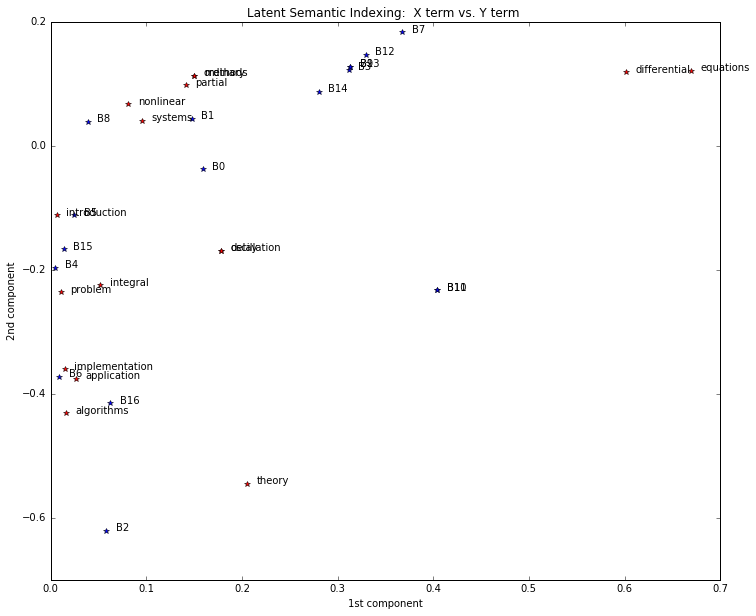

In [36]:
# X:  Keywords

nX = 16
Xtext = [
        'algorithms',
        'application',
        'delay',
        'differential',
        'equations',
        'implementation',
        'integral',
        'introduction',
        'methods',
        'nonlinear',
        'ordinary',
        'oscillation',
        'partial',
        'problem',
        'systems',
        'theory'
        ]

# Y:  Books

nY = 17

# Book: 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17   # Keyword:
#--------------------------------------------------------------------------
coOccurrence =  np.array([
      [ 0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],  # algorithms
      [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1 ],  # application
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0 ],  # delay
      [ 0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0 ],  # differential
      [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0 ],  # equations
      [ 0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],  # implementation
      [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1 ],  # integral
      [ 0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],  # introduction
      [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0 ],  # methods
      [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0 ],  # nonlinear
      [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0 ],  # ordinary
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0 ],  # oscillation
      [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0 ],  # partial
      [ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0 ],  # problem
      [ 0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0 ],  # systems
      [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1 ]   # theory
])

U,S,V = full_svd(coOccurrence)

Xfactor = U[:, :2]
Yfactor = V[:, :2]

plt.rcParams['figure.figsize'] = (12,10)

# plot the 2D projection of the data

plt.plot( Xfactor[:,0], Xfactor[:,1], 'r*', Yfactor[:,0], Yfactor[:,1], 'b*' )
plt.hold()

text_offset = 0.01
for i in range(nX):
     plt.text( Xfactor[i,0]+text_offset, Xfactor[i,1], Xtext[i])

for i in range(nY):
     plt.text( Yfactor[i,0]+text_offset, Yfactor[i,1], ('B%d' % i))

plt.title( 'Latent Semantic Indexing:  X term vs. Y term ' )
plt.xlabel( '1st component' )
plt.ylabel( '2nd component' )
plt.hold()

## The Pseudoinverse

In [37]:
A = np.array( [ [1.2, 1] ,  [2.7, 1] ,  [3.3, 1] , [3.7, 1] ] )

P = pinv(A)     #  the pseudoinverse of A
P

array([[-0.42273042, -0.00693001,  0.15939016,  0.27027027],
       [ 1.4019404 ,  0.26888427, -0.18433818, -0.48648649]])

In [38]:
A.dot(P)

array([[ 0.89466389,  0.26056826,  0.00693001, -0.16216216],
       [ 0.26056826,  0.25017325,  0.24601525,  0.24324324],
       [ 0.00693001,  0.24601525,  0.34164934,  0.40540541],
       [-0.16216216,  0.24324324,  0.40540541,  0.51351351]])

In [39]:
P.dot(A)      #  P is a "left inverse" for A

array([[  1.00000000e+00,  -1.11022302e-16],
       [ -6.66133815e-16,   1.00000000e+00]])

In [40]:
error = norm( A.dot(P).dot(A)  -  A )   #  consequently  A P A  =  A
error

2.7012892057857038e-15

## Computation of the Pseudoinverse -- using the SVD

If  $A = U S V'$, then it has pseudoinverse  $A^- = V ~ S^- ~ U'$, where:

$$
\begin{pmatrix}
\sigma_1 &          &        & \\
         & \sigma_2 &        & \\
         &          & \ddots & \\
         &          &        & \sigma_p \\
         &          &        & \\
         &          &        & \\
\end{pmatrix}{}^-
~~=~~
\begin{pmatrix}
\sigma_1^- &          &        &   ~    &  ~     &  \\
         & \sigma_2^- &        &   ~    &  ~     &  \\
         &               & \ddots   &        &   ~    &     \\
         &               &          & \sigma_p^- &  ~      &
\end{pmatrix}
$$
where $$
\sigma^- ~=~
\left\{
\begin{array}{ll} 1/\sigma & \sigma \neq 0 \\ 0 & \sigma = 0 \end{array}
\right.
$$

In [41]:
def Pseudoinverse(A):
    U, S, V = full_svd(A)
    return (V.T).dot(DiagonalPinv(S)).dot(U.T)

In [42]:
def DiagonalPinv(S):
    n, p = S.shape
    Sminus = np.zeros((p,n))
    for i in range(min(p,n)):
        if S[i,i] != 0:
            Sminus[i,i] = 1/S[i,i]
    return Sminus

In [43]:
Pseudoinverse(A)

array([[-0.42273042, -0.00693001,  0.15939016,  0.27027027],
       [ 1.4019404 ,  0.26888427, -0.18433818, -0.48648649]])

In [44]:
pinv(A)

array([[-0.42273042, -0.00693001,  0.15939016,  0.27027027],
       [ 1.4019404 ,  0.26888427, -0.18433818, -0.48648649]])

In [45]:
U, S, V = full_svd(A)
S.dot( V.dot( pinv(A).dot(U) ) )

array([[  1.00000000e+00,   1.01187604e-15,   8.32463154e-17,
          6.39472210e-18],
       [  1.25804330e-16,   1.00000000e+00,   1.67345434e-16,
          3.29236491e-16],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]])

### Properties of the Pseudoinverse

In [46]:
A = rand(4,3)
P = inv(A.T.dot(A)).dot(A.T)
P

array([[-0.82617343, -0.24512849,  1.65842745,  0.00881616],
       [ 0.15079373,  1.32427885, -0.70338032, -0.69655301],
       [ 1.82879427, -0.4279703 , -1.31863778,  1.2716055 ]])

In [47]:
P.dot(A)

array([[  1.00000000e+00,   3.44342610e-16,  -7.65013053e-16],
       [  4.99600361e-16,   1.00000000e+00,   4.44089210e-16],
       [ -5.55111512e-16,  -5.68989300e-16,   1.00000000e+00]])

In [48]:
A.dot(P)

array([[ 0.63866162,  0.17820281, -0.15588903,  0.41798962],
       [ 0.17820281,  0.91211495,  0.07688047, -0.20614175],
       [-0.15588903,  0.07688047,  0.93274617,  0.18032958],
       [ 0.41798962, -0.20614175,  0.18032958,  0.51647726]])

In [49]:
norm( A.dot(P).dot(A) - A )

8.6533320887260379e-16

In [50]:
norm( P.dot(A).dot(P) - P )

3.2330820069334966e-15

In [51]:
norm( (A.dot(P)).T  -  A.dot(P) )

1.0362907589042387e-15

In [52]:
norm( (P.dot(A)).T  -  P.dot(A) )

1.4795213370438157e-15

In [53]:
essentially_equal =  lambda X,Y:  (np.max(np.abs(X-Y)) < 1e-14 * (norm(X)+norm(Y))).all()

In [54]:
essentially_equal( (P.dot(A)).T , P.dot(A) )

True

In [55]:
essentially_equal( A.dot(P).T, A.dot(P) )

True

In [56]:
essentially_equal( A.dot(P).dot(A), A )

True

In [57]:
A

array([[ 0.51430022,  0.40686844,  0.54801658],
       [ 0.71480648,  0.9320886 ,  0.3435071 ],
       [ 0.96219102,  0.34002685,  0.32139958],
       [ 0.49869876,  0.08115711,  0.44715981]])

In [58]:
U,S,V = full_svd(A)
essentially_equal( A, U.dot(S).dot(V.T) )
# U,S,V

True

In [59]:
1/diag(S)

array([ 0.53888834,  1.90312704,  3.03654953])

In [60]:
S_inv = np.zeros(S.T.shape)
m = min(S.shape)
for i in range(m):
    if S[i,i] != 0:
        S_inv[i,i] = 1/S[i,i]
diag( S_inv ) # notice these are not in descending order

array([ 0.53888834,  1.90312704,  3.03654953])

In [61]:
U.dot(S).dot(V.T)

array([[ 0.51430022,  0.40686844,  0.54801658],
       [ 0.71480648,  0.9320886 ,  0.3435071 ],
       [ 0.96219102,  0.34002685,  0.32139958],
       [ 0.49869876,  0.08115711,  0.44715981]])

In [62]:
norm( pinv(A) - V.dot(S_inv).dot(U.T) )

3.5975337699988621e-16

In [63]:
S.dot(S_inv)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [64]:
S_inv.dot(S)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [65]:
pseudoinverse  =  lambda X: inv(X.T.dot(X)).dot(X.T)
P = pseudoinverse(A)
P

array([[-0.82617343, -0.24512849,  1.65842745,  0.00881616],
       [ 0.15079373,  1.32427885, -0.70338032, -0.69655301],
       [ 1.82879427, -0.4279703 , -1.31863778,  1.2716055 ]])

In [66]:
b = rand(4,1)
P.dot(b)

array([[-0.1323396 ],
       [-0.03407274],
       [ 1.42317602]])

## Implementing the SVD

In [67]:
A = rand(3,3)
U, S, V = full_svd(A)
U, S, V

(array([[-0.40721114, -0.47869909, -0.77783434],
        [-0.73109946, -0.33960397,  0.59174548],
        [-0.54742365,  0.80963963, -0.21168613]]),
 array([[ 1.63441205,  0.        ,  0.        ],
        [ 0.        ,  0.69612043,  0.        ],
        [ 0.        ,  0.        ,  0.30257487]]),
 array([[-0.45740379,  0.53501272, -0.71031202],
        [-0.55572666, -0.79555792, -0.24136171],
        [-0.69422594,  0.28433956,  0.66121204]]))

In [68]:
eig(A.T.dot(A))

(array([ 2.67130274,  0.09155155,  0.48458366]),
 array([[-0.45740379, -0.71031202,  0.53501272],
        [-0.55572666, -0.24136171, -0.79555792],
        [-0.69422594,  0.66121204,  0.28433956]]))

In [69]:
def SimpleSVD(A):
    L, Q = eig(A.T.dot(A))
    V = Q
    S = diag(np.sqrt(L))
    U = A.dot(V).dot(pinv(S))
    return (U,S,V)           

In [70]:
U,S,V = SimpleSVD(A)
U,S,V

(array([[-0.40721114, -0.77783434, -0.47869909],
        [-0.73109946,  0.59174548, -0.33960397],
        [-0.54742365, -0.21168613,  0.80963963]]),
 array([[ 1.63441205,  0.        ,  0.        ],
        [ 0.        ,  0.30257487,  0.        ],
        [ 0.        ,  0.        ,  0.69612043]]),
 array([[-0.45740379, -0.71031202,  0.53501272],
        [-0.55572666, -0.24136171, -0.79555792],
        [-0.69422594,  0.66121204,  0.28433956]]))

In [71]:
def reversed(L):
    return [x for x in list(L).__reversed__()]

In [72]:
def GeneralSquareSVD(A):
    L, V = eig(A.T.dot(A));  ### Jacobi(A.T.dot(A))V = Q
    L = diag(L)
    S = np.sqrt(abs(L))
    Spinv = pinv(S)
    U = A.dot(V).dot(Spinv)
    singular_values = diag(Spinv)
    ordering = list( np.argsort( singular_values ) )
    U = U[:,ordering]
    S = S[ordering,ordering]
    V = V[:,ordering]
    return (U,S,V)

In [73]:
U,S,V = GeneralSquareSVD(A)
U,S,V

(array([[-0.40721114, -0.47869909, -0.77783434],
        [-0.73109946, -0.33960397,  0.59174548],
        [-0.54742365,  0.80963963, -0.21168613]]),
 array([ 1.63441205,  0.69612043,  0.30257487]),
 array([[-0.45740379,  0.53501272, -0.71031202],
        [-0.55572666, -0.79555792, -0.24136171],
        [-0.69422594,  0.28433956,  0.66121204]]))

In [74]:
U,S,V = full_svd(A)
U,S,V

(array([[-0.40721114, -0.47869909, -0.77783434],
        [-0.73109946, -0.33960397,  0.59174548],
        [-0.54742365,  0.80963963, -0.21168613]]),
 array([[ 1.63441205,  0.        ,  0.        ],
        [ 0.        ,  0.69612043,  0.        ],
        [ 0.        ,  0.        ,  0.30257487]]),
 array([[-0.45740379,  0.53501272, -0.71031202],
        [-0.55572666, -0.79555792, -0.24136171],
        [-0.69422594,  0.28433956,  0.66121204]]))

## General non-square SVD

In [75]:
def SimpleSVD(A):
    n, p = A.shape
    if (n > p):
        L, Q = eig(A.T.dot(A));  ### Jacobi(A.T).dot(A);  #  (A' * A)  is a  p x p  matrix
        V = Q
        S = diag(np.sqrt(abs(L)))
        Sinv = pinv(S.T)
        U = A.dot(V).dot(Sinv);        #  yield a rectangular matrix U
    else:
        L, Q = eig(A.T.dot(A));  ### Jacobi(A).dot(A.T);  #  (A * A')  is a  n x n  matrix
        U = Q
        S = diag(np.sqrt(abs(L)))
        Sinv = pinv(S.T)
        V = Sinv.dot(U.T).dot(A.T);    #  yield a rectangular matrix V
    return (U,S,V)

In [76]:
SimpleSVD(A)

(array([[-0.45740379, -0.71031202,  0.53501272],
        [-0.55572666, -0.24136171, -0.79555792],
        [-0.69422594,  0.66121204,  0.28433956]]),
 array([[ 1.63441205,  0.        ,  0.        ],
        [ 0.        ,  0.30257487,  0.        ],
        [ 0.        ,  0.        ,  0.69612043]]),
 array([[-0.40721114, -0.73109946, -0.54742365],
        [-0.77783434,  0.59174548, -0.21168613],
        [-0.47869909, -0.33960397,  0.80963963]]))

## Cleverer SVD implementation

In [77]:
def ClevererSVD(A):
    n, p = A.shape
    if (n > p):
        L, Q = eig(A.T.dot(A));  ### Jacobi(A.T).dot(A);  #  (A' * A)  is a  p x p  matrix
        V = Q
        S = diag(np.sqrt(abs(L)))
        Sinv = pinv(S.T)
        U = A.dot(V).dot(Sinv);        #  yield a rectangular matrix U
    else:
        L, Q = eig(A.T.dot(A));  ### Jacobi(A).dot(A.T);  #  (A * A')  is a  n x n  matrix
        U = Q
        S = diag(np.sqrt(abs(L)))
        Sinv = pinv(S.T)
        V = Sinv.dot(U.T).dot(A.T);    #  yield a rectangular matrix V
    singular_values = diag(Sinv)
    ordering = list( reversed( np.argsort( singular_values ) ) )
    U = U[:,ordering]
    S = S[ordering][:,ordering]
    V = V[:,ordering]
    return (U,S,V)

In [78]:
U,S,V = ClevererSVD(A)
U,S,V

(array([[-0.71031202,  0.53501272, -0.45740379],
        [-0.24136171, -0.79555792, -0.55572666],
        [ 0.66121204,  0.28433956, -0.69422594]]),
 array([[ 0.30257487,  0.        ,  0.        ],
        [ 0.        ,  0.69612043,  0.        ],
        [ 0.        ,  0.        ,  1.63441205]]),
 array([[-0.73109946, -0.54742365, -0.40721114],
        [ 0.59174548, -0.21168613, -0.77783434],
        [-0.33960397,  0.80963963, -0.47869909]]))

In [79]:
U,S,V = full_svd(A)
U,S,V

(array([[-0.40721114, -0.47869909, -0.77783434],
        [-0.73109946, -0.33960397,  0.59174548],
        [-0.54742365,  0.80963963, -0.21168613]]),
 array([[ 1.63441205,  0.        ,  0.        ],
        [ 0.        ,  0.69612043,  0.        ],
        [ 0.        ,  0.        ,  0.30257487]]),
 array([[-0.45740379,  0.53501272, -0.71031202],
        [-0.55572666, -0.79555792, -0.24136171],
        [-0.69422594,  0.28433956,  0.66121204]]))